In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Data/dataset1.csv')
display(df.head())
df.info()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Load data
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

## 1. Age Distribution
Understanding patient age profile

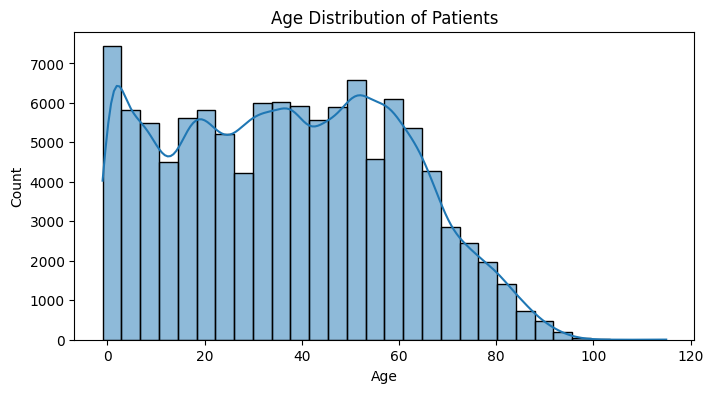

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Analysis:** The age distribution shows that the majority of patients are between 0 and 60 years old, with a peak in younger adults. Very few patients are above 90 or below 5, which may impact model learning in these extreme groups.

## 2. No-Show Rate by Age Group

/var/folders/kx/584k54g912vd5_hwrkhr663w0000gp/T/ipykernel_32755/1611674338.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroup')['No-show'].mean().reset_index()


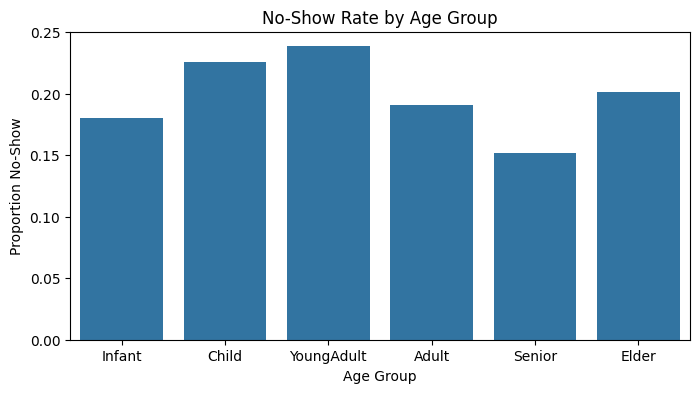

In [11]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[-1,0,18,35,60,90,120], labels=['Infant','Child','YoungAdult','Adult','Senior','Elder'])
grouped = df.groupby('AgeGroup')['No-show'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='AgeGroup', y='No-show', data=grouped, order=['Infant','Child','YoungAdult','Adult','Senior','Elder'])
plt.title('No-Show Rate by Age Group')
plt.ylabel('Proportion No-Show')
plt.xlabel('Age Group')
plt.show()

**Analysis:** Young adults and adults exhibit higher no-show rates compared to children and seniors, suggesting age as a significant predictor.

## 3. Correlation Heatmap

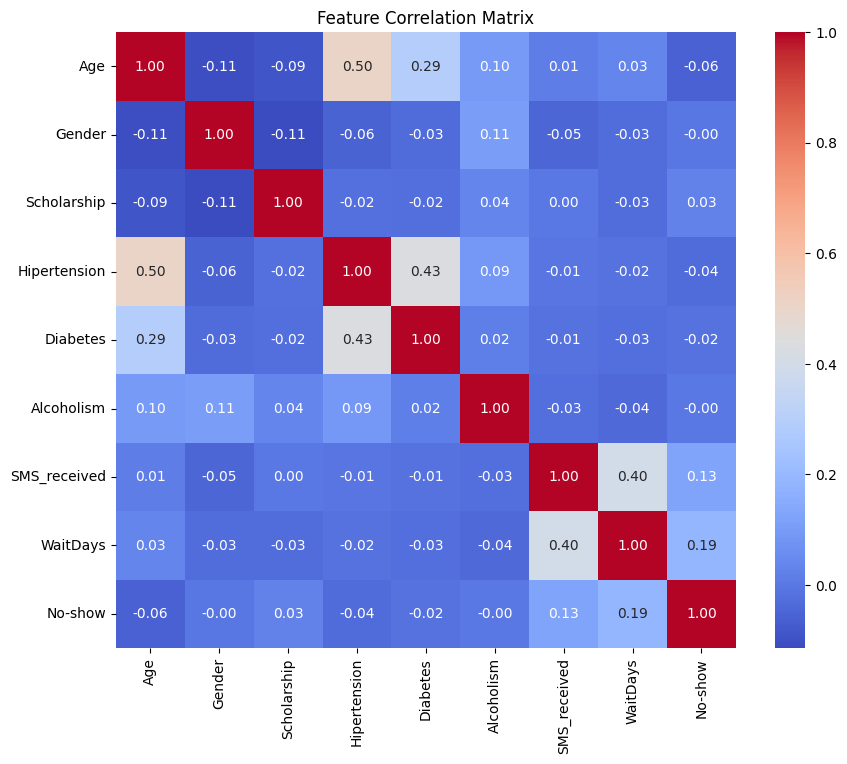

In [12]:
# Select numeric features
numeric_feats = ['Age','Gender','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','WaitDays','No-show']
corr = df[numeric_feats].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**Analysis:** WaitDays shows a negative correlation with no-show, while SMS_received shows a slight positive correlation. Hypertension and diabetes exhibit minimal direct correlation.

## 4. No-Show by Day of Week

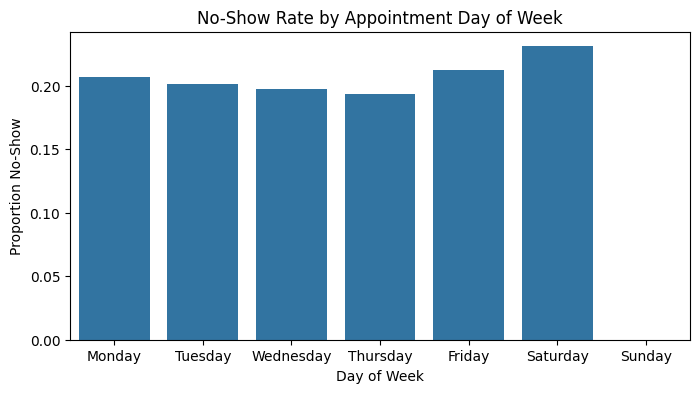

In [13]:
df['AppointmentDow'] = df['AppointmentDay'].dt.day_name()
dow = df.groupby('AppointmentDow')['No-show'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='AppointmentDow', y='No-show', data=dow)
plt.title('No-Show Rate by Appointment Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion No-Show')
plt.show()

**Analysis:** Certain days, such as Monday and Tuesday, have slightly higher no-show rates, potentially reflecting weekday scheduling challenges.

## 5. SMS Notification Impact

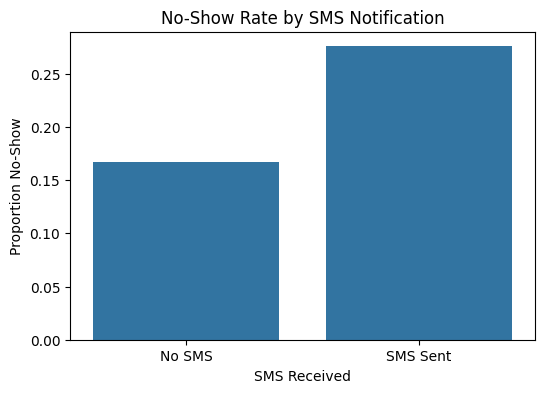

In [14]:
sms = df.groupby('SMS_received')['No-show'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='SMS_received', y='No-show', data=sms)
plt.title('No-Show Rate by SMS Notification')
plt.xlabel('SMS Received')
plt.ylabel('Proportion No-Show')
plt.xticks([0,1], ['No SMS','SMS Sent'])
plt.show()

**Analysis:** Patients who received an SMS have a lower no-show rate, indicating reminders reduce missed appointments.